# <center>**🚗 Car Price Prediction Using Machine Learning 📉**</center>

## **Introduction 🌟**

In today's data-driven world, machine learning (ML) has become a powerful tool in predicting outcomes based on historical data. One exciting application of ML is in the automotive industry, where predicting car prices can greatly benefit buyers, sellers, and dealers alike. This project focuses on building a predictive model to estimate car prices using a dataset of various car attributes. 

---

### **1. Background 📚**

#### **1.1 Importance of Car Price Prediction 🏷️**

Accurate car price prediction can significantly impact decision-making processes. For buyers, it helps in making informed decisions about purchasing a vehicle, while for sellers, it ensures they set competitive prices. Dealers can use these predictions to optimize their inventory and pricing strategies.

#### **1.2 Machine Learning in Automotive Industry 🚗🤖**

Machine learning models have shown tremendous promise in various aspects of the automotive industry, from predicting vehicle performance to forecasting market trends. Car price prediction is one such application where ML can leverage historical data to predict future prices with considerable accuracy.

---

### **2. Project Objectives 🎯**

#### **2.1 Predictive Modeling 🧠**

The primary goal of this project is to develop a predictive model that estimates car prices based on a range of features such as make, model, year of manufacture, mileage, and more.

#### **2.2 Performance Evaluation 📊**

Evaluating the performance of the predictive model is crucial to ensure its reliability. This involves measuring how well the model predicts car prices and comparing it against various benchmarks.

---

### **3. Dataset Overview 📂**

#### **3.1 Data Sources 📍**

The dataset used in this project comprises various attributes of cars, including but not limited to:
- **Make**: Brand of the car 🚘
- **Model**: Specific model of the car 🏎️
- **Year**: Year of manufacture 📅
- **Mileage**: Distance the car has traveled 🛣️
- **Engine Size**: Capacity of the engine 🛠️
- **Fuel Type**: Type of fuel used ⛽

#### **3.2 Data Preprocessing 🔄**

Data preprocessing involves cleaning and transforming the dataset to prepare it for analysis. This includes handling missing values, encoding categorical variables, and normalizing numerical features.

---

### **4. Methodology 🛠️**

#### **4.1 Exploratory Data Analysis (EDA) 🔍**

EDA is the first step in understanding the dataset. This phase involves visualizing data distributions, identifying patterns, and discovering insights through various statistical techniques.

#### **4.2 Feature Selection 🔧**

Selecting the most relevant features is crucial for building an efficient model. This process involves evaluating the impact of different features on the target variable (car price) and choosing those that contribute most to the prediction.

#### **4.3 Model Selection and Training 🏋️‍♂️**

Several machine learning algorithms can be used for regression tasks, including:
- **Linear Regression** 📈
- **Decision Trees** 🌳
- **Random Forests** 🌲
- **Gradient Boosting Machines (GBM)** 🚀

Training involves fitting these models to the dataset and tuning their parameters to improve performance.

---

### **5. Evaluation and Results 📑**

#### **5.1 Model Evaluation Metrics 📏**

To assess the model’s performance, we use various metrics such as:
- **Mean Absolute Error (MAE)** 🧮
- **Mean Squared Error (MSE)** 📉
- **R-squared (R²)** 🧩

#### **5.2 Results and Insights 📈**

This section presents the results obtained from different models and discusses their effectiveness. Key insights into factors influencing car prices and the model’s predictive accuracy will be highlighted.

---



In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error

In [2]:
cars=pd.read_csv('cars.csv')

In [3]:
cars.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
1765,Chevrolet Sail Hatchback 1.2 LS,2015,280000,22255,Petrol,Individual,Manual,First Owner
2341,Renault KWID 1.0 RXT Optional,2016,350000,20000,Petrol,Individual,Manual,First Owner
3667,Tata Indica Vista Terra 1.4 TDI,2011,90000,80000,Diesel,Individual,Manual,First Owner
3806,Honda Amaze VX i-DTEC,2016,700000,35000,Diesel,Individual,Manual,First Owner
2178,Mercedes-Benz GL-Class 350 CDI Blue Efficiency,2014,4400000,100000,Diesel,Individual,Automatic,Second Owner
1841,Maruti Ertiga VXI,2015,625000,11918,Petrol,Trustmark Dealer,Manual,First Owner
1678,Hyundai Santro Xing GLS,2008,130000,100000,Petrol,Individual,Manual,First Owner
2619,Ford Ecosport 1.0 Ecoboost Platinum Edition BSIV,2013,650000,45839,Petrol,Dealer,Manual,First Owner
2484,Chevrolet Beat Diesel LS,2013,195000,47253,Diesel,Dealer,Manual,First Owner
771,Toyota Innova Crysta 2.4 ZX MT,2017,1330000,91195,Diesel,Dealer,Manual,First Owner


In [4]:
np.shape(cars)

(4340, 8)

In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [6]:
cars.drop(columns=['name'], axis=1, inplace=True)

In [7]:
cars.dtypes

year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

In [8]:
cars.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [9]:
cars.describe(include='all')

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
count,4340.000000,4.340000e+03,4340.000000,4340,4340,4340,4340
unique,NaN,NaN,NaN,5,3,2,5
top,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner
freq,NaN,NaN,NaN,2153,3244,3892,2832
mean,2013.090783,5.041273e+05,66215.777419,NaN,NaN,NaN,NaN
std,4.215344,5.785487e+05,46644.102194,NaN,NaN,NaN,NaN
min,1992.000000,2.000000e+04,1.000000,NaN,NaN,NaN,NaN
25%,2011.000000,2.087498e+05,35000.000000,NaN,NaN,NaN,NaN
50%,2014.000000,3.500000e+05,60000.000000,NaN,NaN,NaN,NaN
75%,2016.000000,6.000000e+05,90000.000000,NaN,NaN,NaN,NaN


In [10]:
cars.nunique()

year              27
selling_price    445
km_driven        770
fuel               5
seller_type        3
transmission       2
owner              5
dtype: int64

In [11]:
cars.duplicated().sum()

np.int64(842)

In [12]:
df=cars.drop_duplicates()

In [13]:
np.shape(df)

(3498, 7)

In [14]:
df.isnull().sum()

year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [15]:
df.columns

Index(['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

<Axes: >

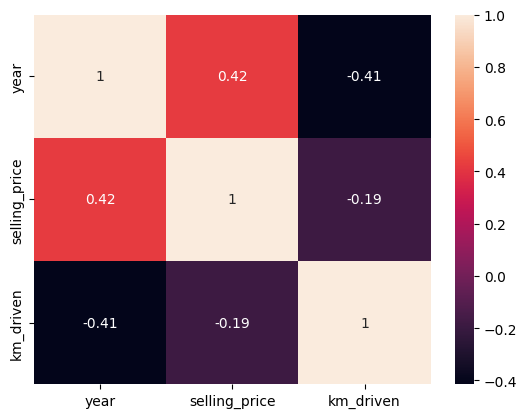

In [16]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [17]:
df['year'].value_counts()

year
2017    336
2012    332
2015    327
2014    315
2013    290
2018    285
2016    273
2011    244
2010    205
2009    167
2019    156
2008    127
2007    114
2006     93
2005     60
2020     45
2004     37
2003     22
2002     17
2001     16
2000     12
1999      9
1998      9
1997      3
1996      2
1995      1
1992      1
Name: count, dtype: int64

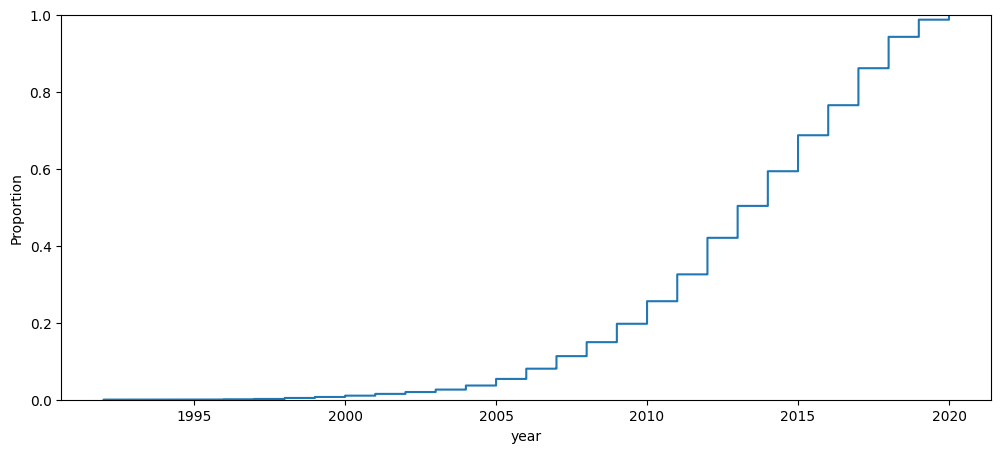

In [18]:
plt.figure(figsize=(12, 5))
sns.ecdfplot(df['year'])
plt.show()

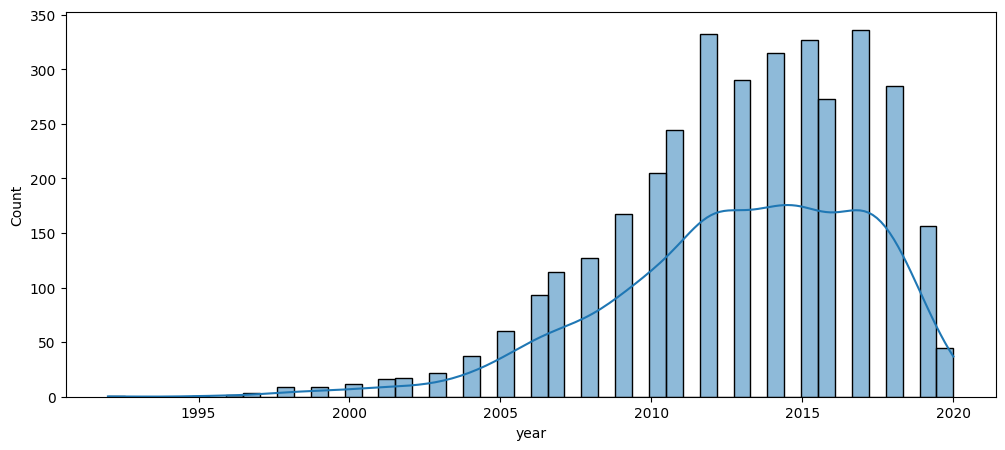

In [19]:
plt.figure(figsize=(12, 5))
sns.histplot(df['year'], kde=True, bins=50, alpha=0.5)
plt.show()

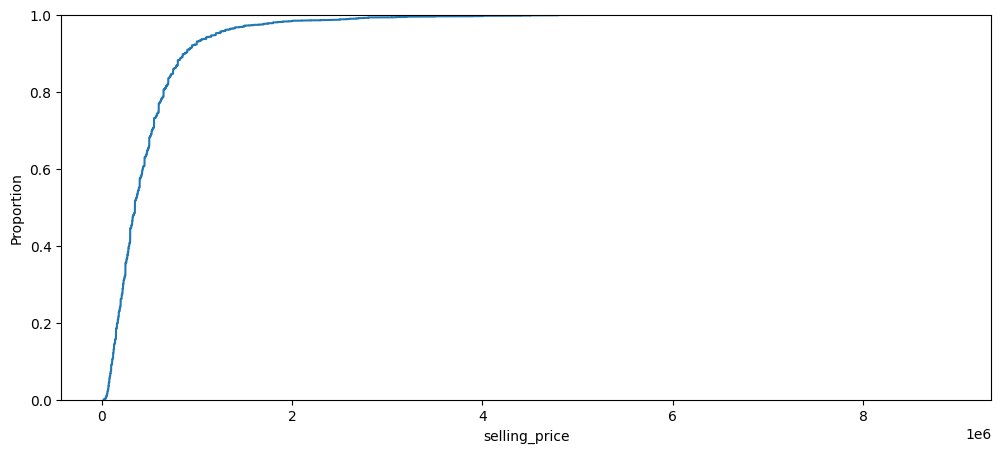

In [20]:
plt.figure(figsize=(12, 5))
sns.ecdfplot(df['selling_price'])
plt.show()

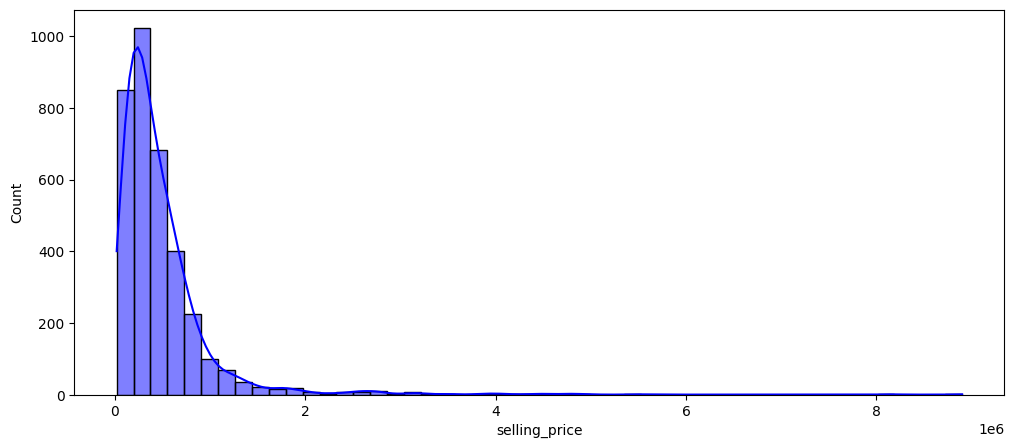

In [21]:
plt.figure(figsize=(12, 5))
sns.histplot(df['selling_price'], kde=True, bins=50, alpha=0.5, color='blue')
plt.show()

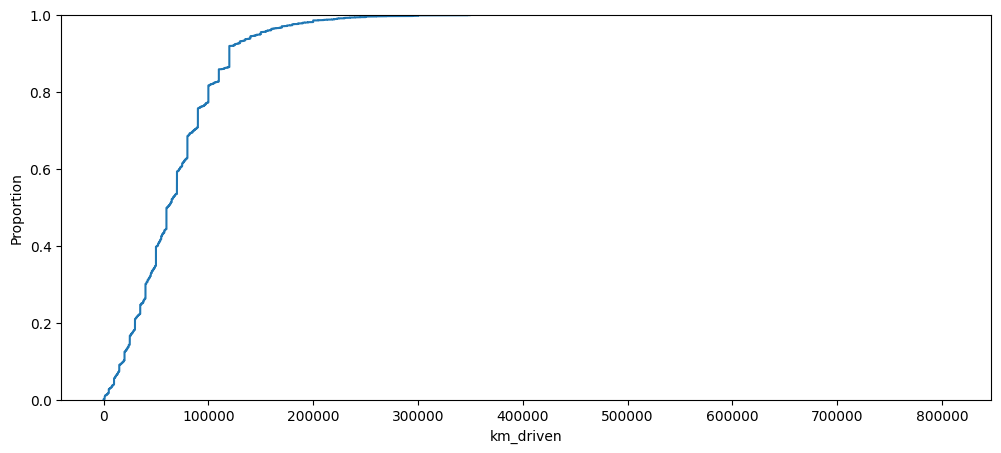

In [22]:
plt.figure(figsize=(12, 5))
sns.ecdfplot(df['km_driven'])
plt.show()

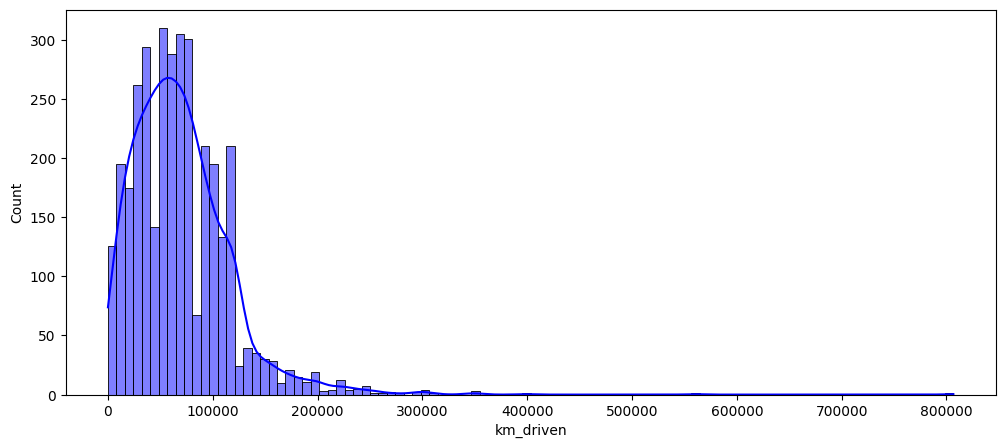

In [23]:
plt.figure(figsize=(12, 5))
sns.histplot(df['km_driven'], kde=True, bins=100, alpha=0.5, color='blue')
plt.show()

In [24]:
df['fuel'].value_counts()

fuel
Diesel      1762
Petrol      1676
CNG           37
LPG           22
Electric       1
Name: count, dtype: int64

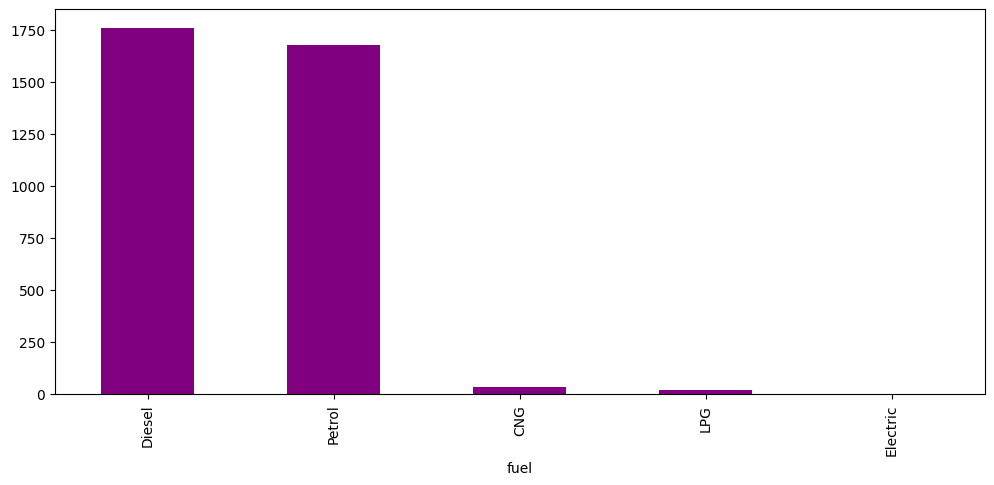

In [25]:
plt.figure(figsize=(12, 5))
df['fuel'].value_counts().plot(kind='bar', color='purple')
plt.show()

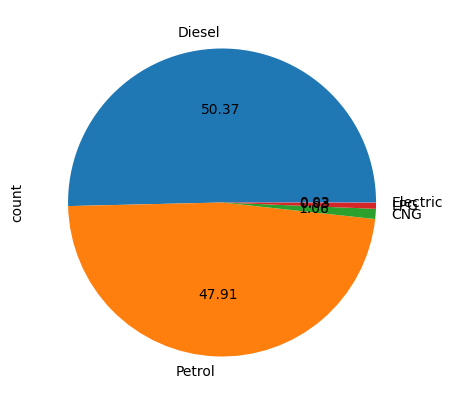

In [26]:
plt.figure(figsize=(12, 5))
df['fuel'].value_counts().plot(kind='pie', autopct='%.2f')
plt.show()

In [27]:
df['seller_type'].value_counts()

seller_type
Individual          2753
Dealer               712
Trustmark Dealer      33
Name: count, dtype: int64

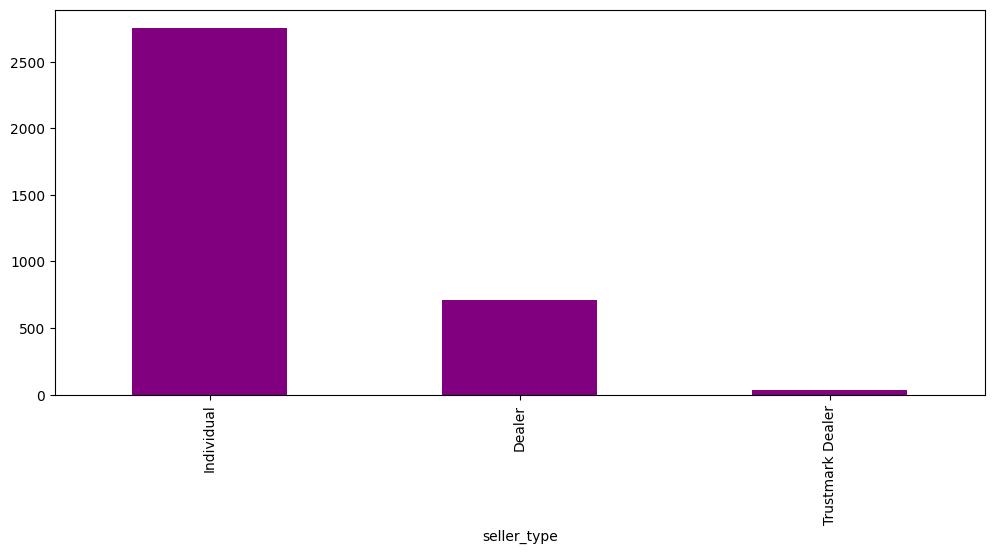

In [28]:
plt.figure(figsize=(12, 5))
df['seller_type'].value_counts().plot(kind='bar', color='purple')
plt.show()

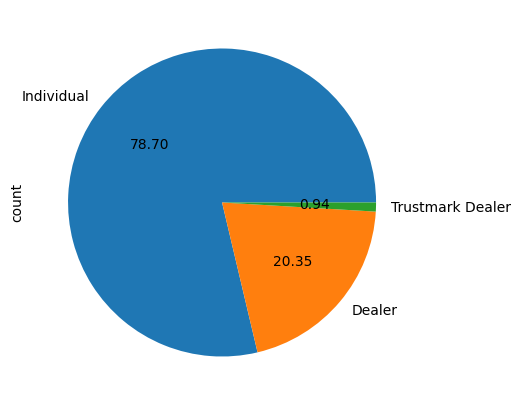

In [29]:
plt.figure(figsize=(12, 5))
df['seller_type'].value_counts().plot(kind='pie', autopct='%.2f')
plt.show()

In [30]:
df['transmission'].value_counts()

transmission
Manual       3187
Automatic     311
Name: count, dtype: int64

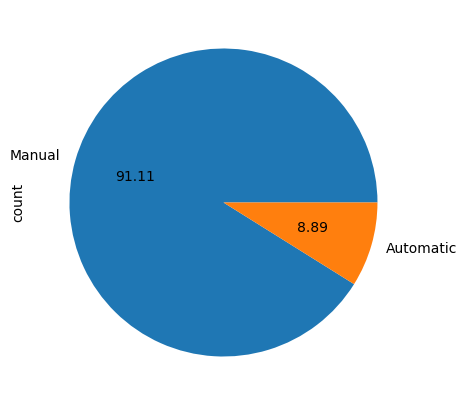

In [31]:
plt.figure(figsize=(12, 5))
df['transmission'].value_counts().plot(kind='pie', autopct='%.2f')
plt.show()

In [32]:
df['owner'].value_counts()

owner
First Owner             2157
Second Owner             964
Third Owner              285
Fourth & Above Owner      75
Test Drive Car            17
Name: count, dtype: int64

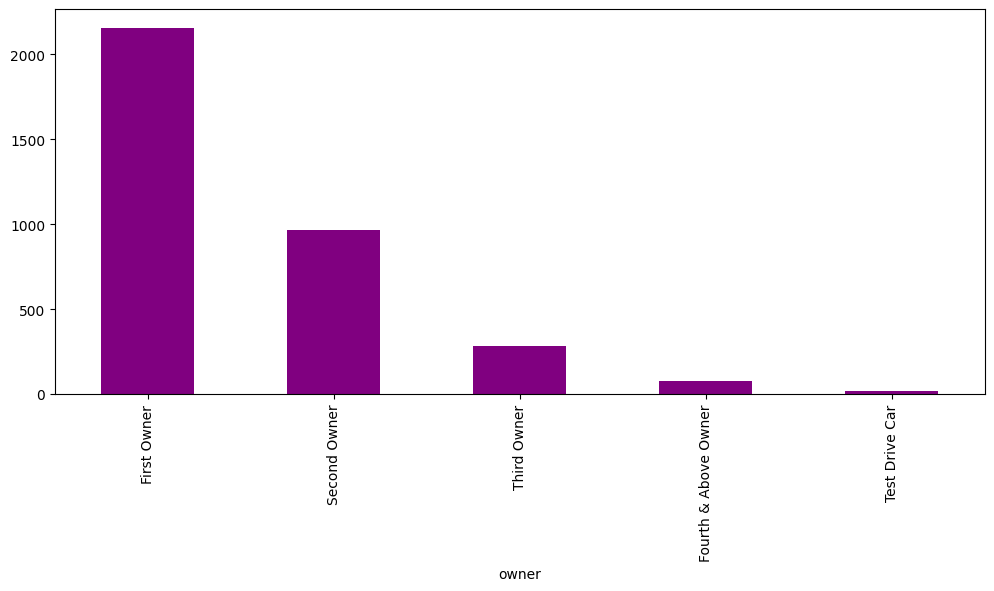

In [33]:
plt.figure(figsize=(12, 5))
df['owner'].value_counts().plot(kind='bar', color='purple')
plt.show()

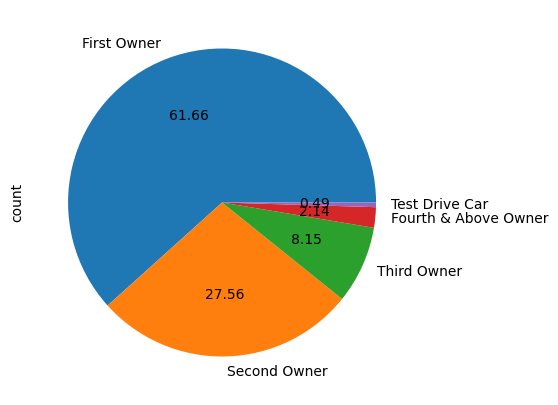

In [34]:
plt.figure(figsize=(12, 5))
df['owner'].value_counts().plot(kind='pie', autopct='%.2f')
plt.show()

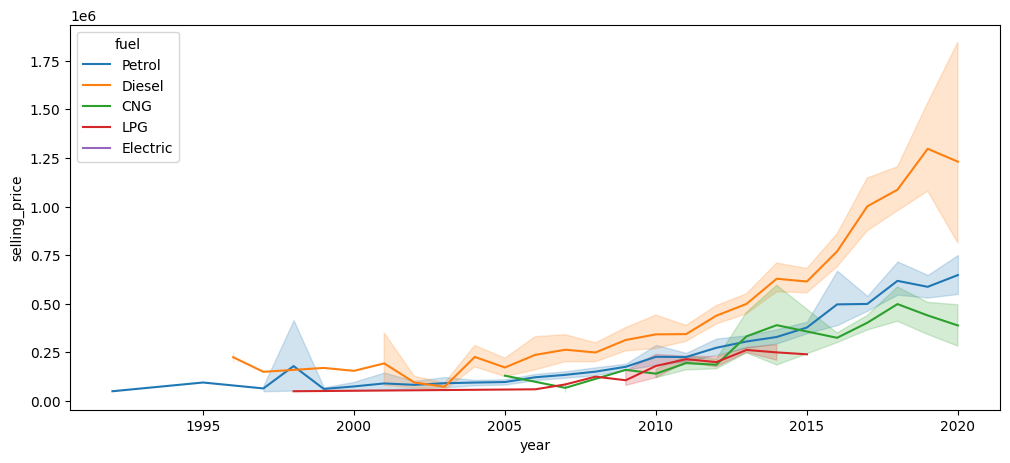

In [35]:
plt.figure(figsize=(12, 5))
sns.lineplot(x=df['year'], y=df['selling_price'], hue='fuel', data=df)
plt.show()

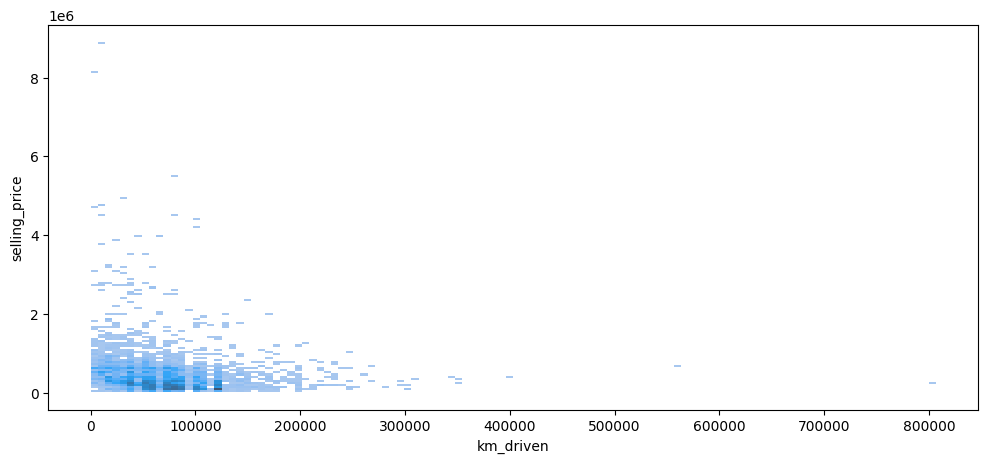

In [36]:
plt.figure(figsize=(12, 5))
sns.histplot(x=df['km_driven'], y=df['selling_price'], data=df, kde=True)
plt.show()

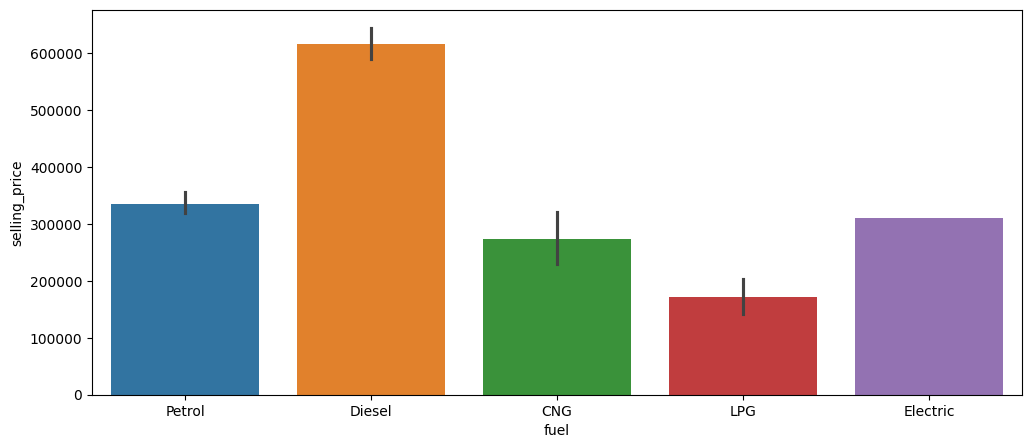

In [37]:
plt.figure(figsize=(12, 5))
sns.barplot(x=df['fuel'], y=df['selling_price'], hue='fuel', data=df)
plt.show()

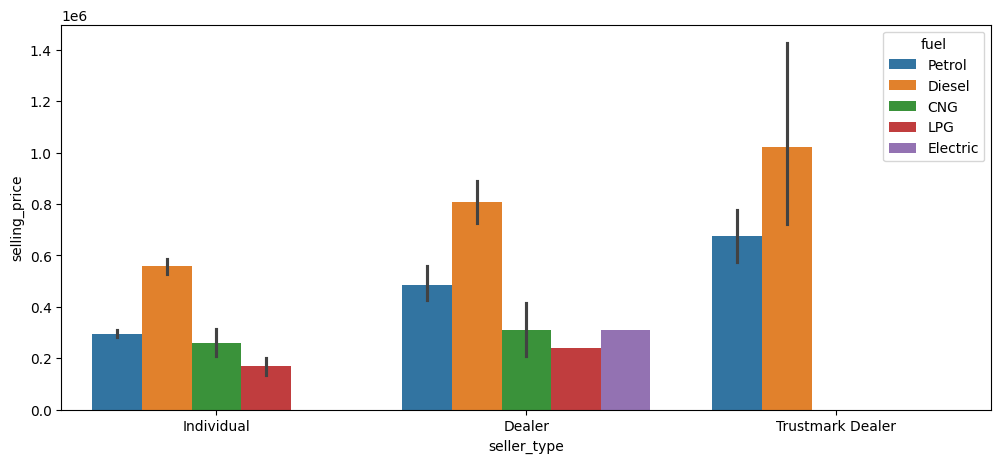

In [38]:
plt.figure(figsize=(12, 5))
sns.barplot(x=df['seller_type'], y=df['selling_price'], hue='fuel', data=df)
plt.show()

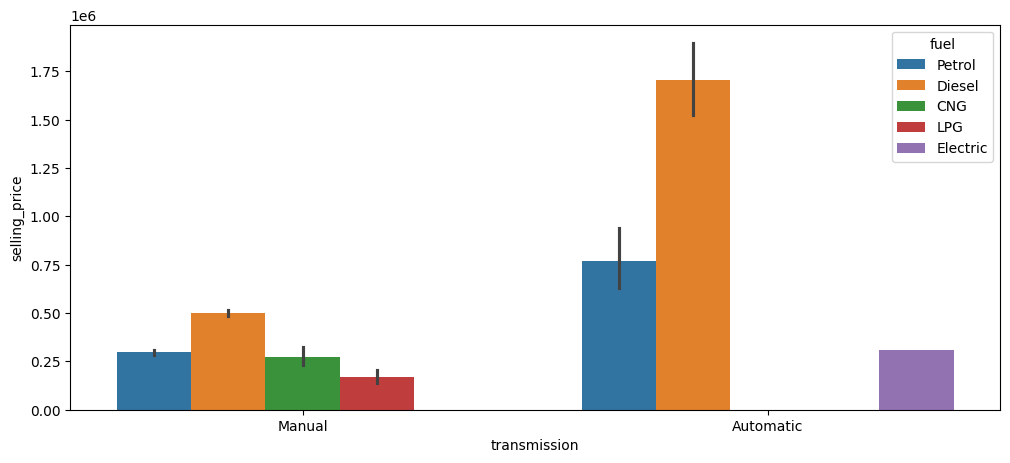

In [39]:
plt.figure(figsize=(12, 5))
sns.barplot(x=df['transmission'], y=df['selling_price'], hue='fuel', data=df)
plt.show()

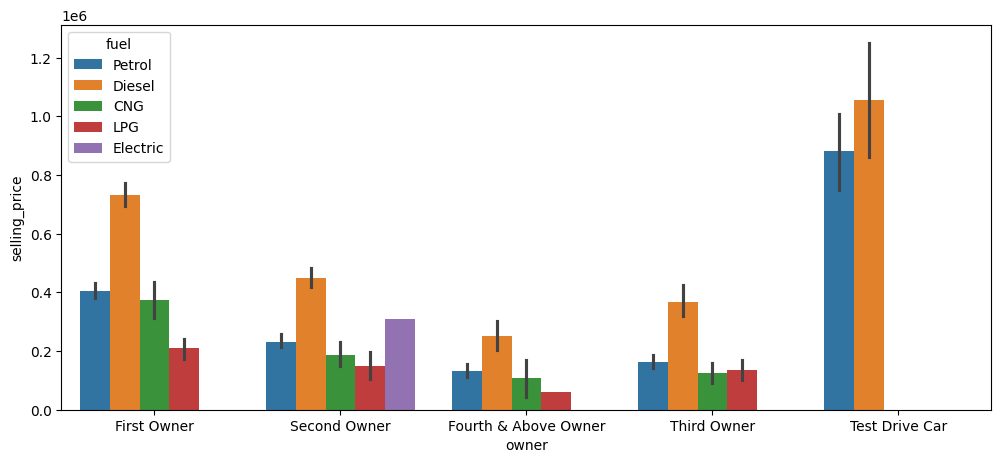

In [40]:
plt.figure(figsize=(12, 5))
sns.barplot(x=df['owner'], y=df['selling_price'], hue='fuel', data=df)
plt.show()

In [41]:
df1=pd.get_dummies(df, columns=['fuel', 'seller_type', 'transmission', 'owner'], drop_first='first', dtype='int')

In [42]:
df1

,year,selling_price,km_driven,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2007,60000,70000,0,0,0,1,1,0,1,0,0,0,0
1,2007,135000,50000,0,0,0,1,1,0,1,0,0,0,0
2,2012,600000,100000,1,0,0,0,1,0,1,0,0,0,0
3,2017,250000,46000,0,0,0,1,1,0,1,0,0,0,0
4,2014,450000,141000,1,0,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4334,2012,600000,170000,1,0,0,0,1,0,1,0,0,0,0
4335,2014,409999,80000,1,0,0,0,1,0,1,0,1,0,0
4337,2009,110000,83000,0,0,0,1,1,0,1,0,1,0,0
4338,2016,865000,90000,1,0,0,0,1,0,1,0,0,0,0


In [43]:
X_train=df1.drop(['selling_price'], axis=1)
y_train=df[['selling_price']]

X_train, X_test, y_train, y_test=train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [44]:
X_train

,year,km_driven,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
175,2007,100000,0,0,0,1,1,0,1,0,1,0,0
1148,2018,26000,0,0,0,1,0,0,0,0,0,0,0
1939,2003,35000,0,0,0,1,1,0,1,0,0,0,0
1150,2016,23000,0,0,0,1,0,0,1,0,0,0,0
1387,2016,25000,0,0,0,1,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,2010,50000,0,0,0,1,1,0,1,0,0,0,0
1280,2016,32000,0,0,0,1,0,0,0,0,0,0,0
1448,2019,27000,0,0,0,1,1,0,1,0,0,0,0
983,2010,110000,1,0,0,0,1,0,1,0,0,0,1


In [45]:
y_train

,selling_price
175,95000
1148,725000
1939,60000
1150,550000
1387,400000
...,...
1245,260000
1280,580000
1448,250000
983,385000


In [46]:
print('X_train Shape =', X_train.shape)
print('X_test Shape =', X_test.shape)
print('y_train Shape =', y_train.shape)
print('y_test Shape =', y_test.shape)

X_train Shape = (2798, 13)
X_test Shape = (700, 13)
y_train Shape = (2798, 1)
y_test Shape = (700, 1)


In [47]:
scaler=StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [48]:
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [49]:
regression=LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [50]:
y_pred=regression.predict(X_test)

In [51]:
print('r2_score =', r2_score(y_test, y_pred))
print('Mean Absolute Error (MAE) =', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE) =', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE) =', root_mean_squared_error(y_test, y_pred))

r2_score = 0.3962730301192331
Mean Absolute Error (MAE) = 212564.75526710064
Mean Squared Error (MSE) = 194539409801.70355
Root Mean Squared Error (RMSE) = 441066.21929332055


In [52]:
forest=RandomForestRegressor()
forest.fit(X_train, y_train)

c:\Users\1117m\anaconda3\envs\ml_env\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [53]:
y_pred1=forest.predict(X_test)

In [54]:
print('r2_score =', r2_score(y_test, y_pred1))
print('Mean Absolute Error (MAE) =', mean_absolute_error(y_test, y_pred1))
print('Mean Squared Error (MSE) =', mean_squared_error(y_test, y_pred1))
print('Root Mean Squared Error (RMSE) =', root_mean_squared_error(y_test, y_pred1))

r2_score = 0.3388170458301246
Mean Absolute Error (MAE) = 208526.0704617697
Mean Squared Error (MSE) = 213053496186.45892
Root Mean Squared Error (RMSE) = 461577.18334690126


In [55]:
boosting=GradientBoostingRegressor()
boosting.fit(X_train, y_train)

c:\Users\1117m\anaconda3\envs\ml_env\lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


GradientBoostingRegressor()

In [56]:
y_pred2=boosting.predict(X_test)

In [57]:
print('r2_score =', r2_score(y_test, y_pred2))
print('Mean Absolute Error (MAE) =', mean_absolute_error(y_test, y_pred2))
print('Mean Squared Error (MSE) =', mean_squared_error(y_test, y_pred2))
print('Root Mean Squared Error (RMSE) =', root_mean_squared_error(y_test, y_pred2))

r2_score = 0.4799188494570803
Mean Absolute Error (MAE) = 183842.81744030403
Mean Squared Error (MSE) = 167586152554.34482
Root Mean Squared Error (RMSE) = 409372.87716010795


# <CENTER> **CONCLUSION** </CENTER>

- For the car price prediction project, I utilized one-hot encoding for categorical variables.
- I applied three regression models: Linear Regression, Random Forest Regressor, and AdaBoost Regressor. The models achieved an accuracy of 49%.